In [1]:
import pandas as pd
import numpy as np

billboard_hot_100 = pd.read_csv("billboard_hot_100.csv")
billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],
                                                            infer_datetime_format=True)

In [2]:
billboard_hot_100.dtypes

Unnamed: 0                        int64
first_day_of_the_week    datetime64[ns]
artist                           object
song_name                        object
position                          int64
last_week_position              float64
peak_position                     int64
weeks_on_chart                    int64
songwriters                      object
producers                        object
promotion_label                  object
dtype: object

In [3]:
billboard_hot_100["year"] = billboard_hot_100["first_day_of_the_week"].dt.year

billboard_hot_100.head()

,Unnamed: 0,first_day_of_the_week,artist,song_name,position,last_week_position,peak_position,weeks_on_chart,songwriters,producers,promotion_label,year
0,0,1958-09-08,Domenico Modugno,Nel Blu Dipinto Di Blu (Volare),1,1.0,1,6,"F.Migliacci, D.Modugno",Not Listed,Decca,1958
1,1,1958-09-08,The Elegants,Little Star,2,2.0,1,6,"V.Picone, A.Venosa",Not Listed,Apt,1958
2,2,1958-09-08,The Everly Brothers,Bird Dog,3,3.0,3,6,B.Bryant,Not Listed,Cadence,1958
3,3,1958-09-08,Jimmy Clanton And His Rockets,Just A Dream,4,4.0,4,6,Not Listed,Not Listed,Ace,1958
4,4,1958-09-08,Perez Prado And His Orchestra,Patricia,5,6.0,2,6,"B.Marcus, P.Prado",Not Listed,RCA Victor,1958


## Song lifetime on chart

In [4]:
max_weeks_on_chart = billboard_hot_100[["artist", "song_name", "weeks_on_chart"]].groupby(by=["artist", "song_name"]).max()
avg_week_on_chart = np.mean(max_weeks_on_chart["weeks_on_chart"])

print("Average max weeks on chart for all songs: ", avg_week_on_chart)

Average max weeks on chart for all songs:  11.055281504867141


In [5]:
max_weeks_on_chart_yearly = billboard_hot_100[["artist", "song_name", "weeks_on_chart", "year"]].groupby(
    by=["artist", "song_name", "year"]).max()
avg_week_on_chart_yearly = max_weeks_on_chart_yearly.groupby(by="year").mean()

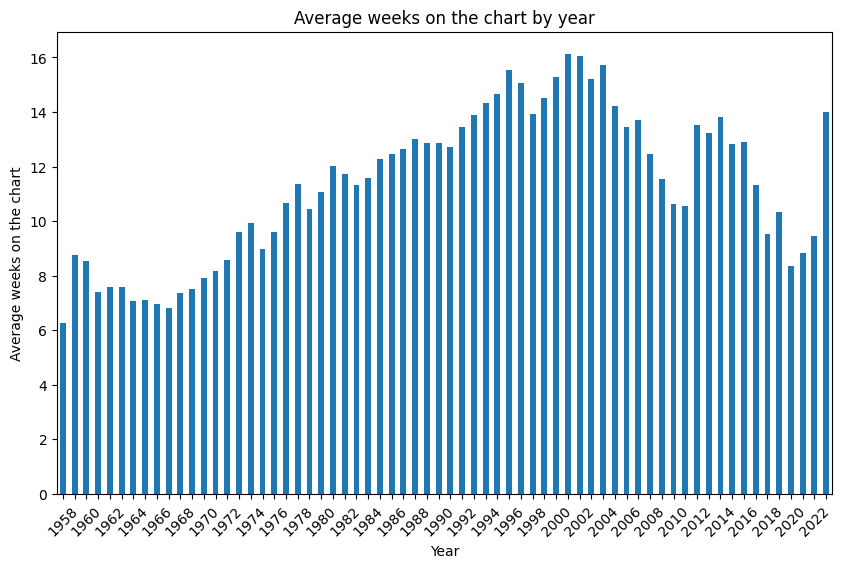

In [29]:
import matplotlib.pyplot as plt

weeks_on_chart_plot = avg_week_on_chart_yearly.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title("Average weeks on the chart by year")
plt.xlabel("Year")
plt.ylabel("Average weeks on the chart")
plt.xticks(rotation = 45)

for label in weeks_on_chart_plot.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

plt.show()

## New songs on the charts